In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from amstools import *

In [3]:
from tensorpotential.calculator import grace_fm, TPCalculator

[tensorpotential] Info: Environment variable TF_USE_LEGACY_KERAS is automatically set to '1'.


2026-02-23 17:31:38.010579: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-23 17:31:38.022825: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771864298.036711 2130441 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771864298.040954 2130441 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771864298.051877 2130441 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [6]:
from amstools.thermodynamics import run_convex_hull_calculation, plot_convex_hull

In [7]:
from amstools.sources import fetch_structures, fetch_mp_reference_df

In [8]:
from ase.build import bulk

# Loading reference convex hull

In [9]:
cache_dir='../../1-AlLi-GRACE-2LAYER/0-data/AlLi_Materials_Project'

In [10]:
ref_df=fetch_mp_reference_df(['Al','Li'], 
                             # mp_api_key='XXXXX',  ## get from https://next-gen.materialsproject.org/api                         
                             max_atoms=32,
                             cache_dir=cache_dir)

In [11]:
ref_df

,name,ase_atoms,e_per_atom,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-1183144,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",NaN,0.010481,0.010481
1,Al__mp-2647008,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",NaN,0.032078,0.032078
2,Al__mp-134,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",NaN,0.000000,0.000000
3,Li__mp-567337,"(Atom('Li', [-0.9218888897176146, 2.8025429460...",NaN,0.008819,0.008819
4,Li__mp-10173,"(Atom('Li', [-1.1807313597921131e-06, 1.740594...",NaN,0.005988,0.005988
5,Li__mp-51,"(Atom('Li', [0.0, 0.0, 0.0], index=0))",NaN,0.001672,0.001672
6,Li__mp-976411,"(Atom('Li', [0.0, 0.0, 1.0216207669999998e-05]...",NaN,0.005889,0.005889
7,Li__mp-1103107,"(Atom('Li', [1.379696372079909, 3.982485883382...",NaN,0.055379,0.055379
8,Li__mp-1063005,"(Atom('Li', [0.0, 0.0, 0.0], index=0), Atom('L...",NaN,0.015671,0.015671
9,Li__mp-1018134,"(Atom('Li', [4.618009551014942, 2.666207852974...",NaN,0.000000,0.000000


In [12]:
struct_dict=fetch_structures(['Al','Li'], 
                             # mp_api_key=MP_API_KEY, 
                             max_atoms=32,
                             cache_dir=cache_dir)

## Compute convex hull for FINETUNED model

In [5]:
calc=TPCalculator("seed/1/final_model/")

2026-02-23 17:31:43.448545: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1771864303.448657 2130441 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8499 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:b3:00.0, compute capability: 8.6


In [13]:
pipeline_dict={}

In [14]:
df, pipeline_dict=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc, pipeline_dict=pipeline_dict)

2026-02-23 17:31:52,616 - root - INFO - Processing structure 'Al__mp-1183144'
2026-02-23 17:31:52,620 - root - INFO - =======================
2026-02-23 17:31:52,621 - root - INFO - Step: optimization
Processing: optimized_structure (4 atom(s)):   0%|                                                                              | 0/1 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1771864313.183972 2130441 service.cc:152] XLA service 0x55900133b6a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771864313.183992 2130441 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2026-02-23 17:31:53.474560: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1771864313.983060 2130441 cuda_dnn.cc:529] Loaded cuDNN version 9

Structure dataset: multiple unique compositions found, trying to construct convex hull


In [15]:
df

,name,ase_atoms,energy,energy_per_atom,equilibrium_volume,equilibrium_bulk_modulus,comp_dict,NUMBER_OF_ATOMS,comp_tuple,n_Al,c_Al,n_Li,c_Li,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-1183144,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",-14.947478,-3.736870,66.363485,76.402860,{'Al': 4},4,"((Al, 1.0),)",4,1.000000,0,0.000000,0.017391,1.739065e-02
1,Al__mp-2647008,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",-7.441203,-3.720601,33.315367,73.927116,{'Al': 2},2,"((Al, 1.0),)",2,1.000000,0,0.000000,0.033659,3.365889e-02
2,Al__mp-134,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",-3.754260,-3.754260,16.502313,79.095873,{'Al': 1},1,"((Al, 1.0),)",1,1.000000,0,0.000000,0.000000,0.000000e+00
3,Li__mp-567337,"(Atom('Li', [-0.9930832018196543, 2.8002636517...",-15.308629,-1.913579,161.359169,13.788045,{'Li': 8},8,"((Li, 1.0),)",0,0.000000,8,1.000000,0.000787,7.865918e-04
4,Li__mp-10173,"(Atom('Li', [-1.0567404055926735e-06, 1.759733...",-3.828056,-1.914028,40.249472,14.864457,{'Li': 2},2,"((Li, 1.0),)",0,0.000000,2,1.000000,0.000337,3.371885e-04
5,Li__mp-51,"(Atom('Li', [0.0, 0.0, 0.0], index=0))",-1.914365,-1.914365,20.185663,14.657538,{'Li': 1},1,"((Li, 1.0),)",0,0.000000,1,1.000000,0.000000,0.000000e+00
6,Li__mp-976411,"(Atom('Li', [2.0870192887547636e-22, 3.6846977...",-7.656647,-1.914162,80.656470,14.767985,{'Li': 4},4,"((Li, 1.0),)",0,0.000000,4,1.000000,0.000203,2.034163e-04
7,Li__mp-1103107,"(Atom('Li', [1.0139757231337894, 4.68552950217...",-22.955472,-1.912956,241.560483,14.667902,{'Li': 12},12,"((Li, 1.0),)",0,0.000000,12,1.000000,0.001409,1.409259e-03
8,Li__mp-1063005,"(Atom('Li', [0.0, 0.0, 0.0], index=0), Atom('L...",-5.704486,-1.901495,60.765976,14.206154,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,0.012870,1.286992e-02
9,Li__mp-1018134,"(Atom('Li', [4.5757073788505265, 2.64178647846...",-5.742351,-1.914117,60.452730,14.825006,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,0.000248,2.483700e-04


## Compute convex hull for "from scratch" model

In [16]:
calc_scr=TPCalculator("../../1-AlLi-GRACE-2LAYER/1-fit/seed/1/final_model/")

In [17]:
pipeline_dict_scr = {}

In [18]:
df_scr, pipeline_dict_scr=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc_scr, pipeline_dict=pipeline_dict_scr)

2026-02-23 17:33:09,768 - root - INFO - Processing structure 'Al__mp-1183144'
2026-02-23 17:33:09,770 - root - INFO - =======================
2026-02-23 17:33:09,771 - root - INFO - Step: optimization
Processing: optimized_structure (4 atom(s)): 100%|██████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.91s/it]
2026-02-23 17:33:15,683 - root - INFO - Step status: finished
2026-02-23 17:33:15,683 - root - INFO - =======================
2026-02-23 17:33:15,684 - root - INFO - =======================
2026-02-23 17:33:15,685 - root - INFO - Step: murnaghan
Processing: strain_1_1 (4 atom(s)): 100%|█████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 84.89it/s]
2026-02-23 17:33:15,823 - root - INFO - Job is done
2026-02-23 17:33:15,824 - root - INFO - Step status: finished
2026-02-23 17:33:15,825 - root - INFO - =======================
2026-02-23 17:33:15,826 - root - INFO - Processing structure 'Al__mp-2647

Structure dataset: multiple unique compositions found, trying to construct convex hull


## Compute convex hull for foundation model GRACE-2L-OMAT-medium-ft-E

In [21]:
calc_fm=grace_fm("GRACE-2L-OMAT-medium-ft-E")

Using cached GRACE model from /home/users/lysogy36/.cache/grace/GRACE-2L-OMAT-medium-ft-E
Model license: Academic Software License


In [22]:
pipeline_dict_fm = {}

In [23]:
df_fm, pipeline_dict_fm=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc_fm, pipeline_dict=pipeline_dict_fm)

2026-02-23 17:36:44,352 - root - INFO - Processing structure 'Al__mp-1183144'
2026-02-23 17:36:44,354 - root - INFO - =======================
2026-02-23 17:36:44,356 - root - INFO - Step: optimization
Processing: optimized_structure (4 atom(s)): 100%|██████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.75s/it]
2026-02-23 17:36:51,113 - root - INFO - Step status: finished
2026-02-23 17:36:51,113 - root - INFO - =======================
2026-02-23 17:36:51,114 - root - INFO - =======================
2026-02-23 17:36:51,114 - root - INFO - Step: murnaghan
Processing: strain_1_1 (4 atom(s)): 100%|█████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 58.24it/s]
2026-02-23 17:36:51,311 - root - INFO - Job is done
2026-02-23 17:36:51,313 - root - INFO - Step status: finished
2026-02-23 17:36:51,313 - root - INFO - =======================
2026-02-23 17:36:51,314 - root - INFO - Processing structure 'Al__mp-2647

Structure dataset: multiple unique compositions found, trying to construct convex hull


# Compare convex hulls

{('Al',
  'Li'): <Axes: title={'center': 'Convex Hull: Al-Li'}, xlabel='Concentration of Li', ylabel='Formation energy (eV/atom)'>}

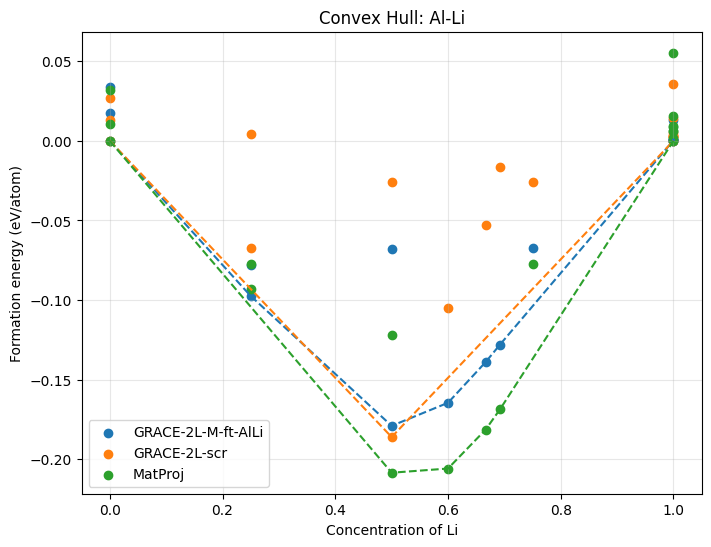

In [26]:
plot_convex_hull({"GRACE-2L-M-ft-AlLi":df, 
                  "GRACE-2L-scr":df_scr, 
                  # "GRACE-2L-OMAT-M-ft-E":df_fm,
                  "MatProj":ref_df
                 })